In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Only consider the top 20k words
max_features = 20000  

# Only consider the first 500 words of each movie review
maxlen = 500

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


17473536/17464789 [==============================] - 1s 0us/step
25000 Training sequences
25000 Validation sequences


In [3]:
embedding_dim = 128

# A integer input for vocab indices.
inputs = keras.Input(shape=(500,), dtype="int64")

# Embedding
x = layers.Embedding(max_features, embedding_dim)(inputs)

# Flatten and Dense
x = layers.Flatten()(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
predictions = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, predictions)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 128)          2560000   
                                                                 
 flatten (Flatten)           (None, 64000)             0         
                                                                 
 dense (Dense)               (None, 1024)              65537024  
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 68,228,353
Trainable params: 68,228,353
Non-tra

2022-12-21 09:18:03.197697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 09:18:03.239513: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 09:18:03.239589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 09:18:03.240276: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
  1/782 [..............................] - ETA: 10:58 - loss: 0.6958 - accuracy: 0.4688

2022-12-21 09:18:04.728911: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


782/782 [==============================] - 7s 8ms/step - loss: 0.3869 - accuracy: 0.8143 - val_loss: 0.2890 - val_accuracy: 0.8790
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0508 - accuracy: 0.9838 - val_loss: 0.4785 - val_accuracy: 0.8502
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.7310 - val_accuracy: 0.8504
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.7283 - val_accuracy: 0.8481
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0121 - accuracy: 0.9957 - val_loss: 0.8403 - val_accuracy: 0.8477
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0084 - accuracy: 0.9970 - val_loss: 0.8717 - val_accuracy: 0.8409
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.9405 - val_accuracy: 0.8462
Epoch 8/50
782/78

<Figure size 1000x1000 with 0 Axes>

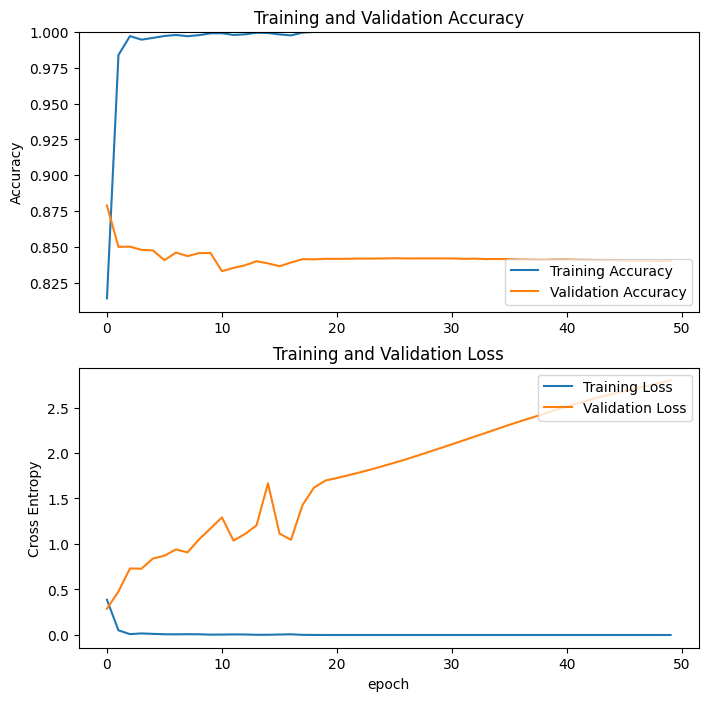

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()